<a href="https://colab.research.google.com/github/TimothyLMoore/fastai-exercises/blob/main/Exercise01_UrbanRuralNature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [3]:
!pip install duckduckgo_search
!pip install fastcore.all


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement fastcore.all (from versions: none)
ERROR: No matching distribution found for fastcore.all


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=60):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
urls = search_images('urban photos', max_images=1)
urls[0]

Searching for 'urban photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


"https://get.pxhere.com/photo/skyline-city-skyscraper-cityscape-downtown-metropolis-neighbourhood-bird's-eye-view-aerial-photography-urban-area-human-settlement-metropolitan-area-1409225.jpg"

In [6]:
!pip install fastai

In [7]:
!pip install fastdownload

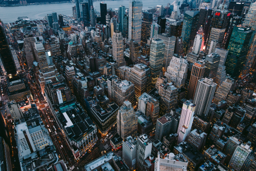

In [8]:
from fastdownload import download_url
dest = 'rural.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'rural photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


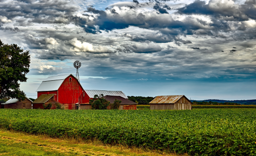

In [9]:
download_url(search_images('rural photos', max_images=1)[0], 'rural.jpg', show_progress=False)
Image.open('rural.jpg').to_thumb(256,256)

Searching for 'nature photos'


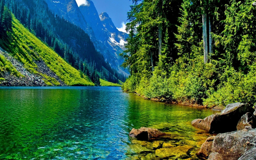

In [10]:
download_url(search_images('nature photos', max_images=1)[0], 'nature.jpg', show_progress=False)
Image.open('nature.jpg').to_thumb(256,256)

In [11]:
searches = 'urban','rural','nature'
path = Path('urban_rural_nature')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'urban photo'
Searching for 'urban sun photo'
Searching for 'urban shade photo'
Searching for 'rural photo'
Searching for 'rural sun photo'
Searching for 'rural shade photo'
Searching for 'nature photo'
Searching for 'nature sun photo'
Searching for 'nature shade photo'


In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

19

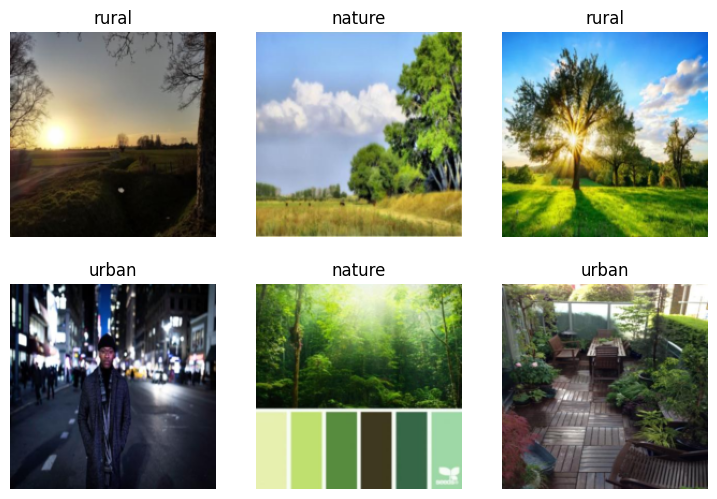

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 90.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.553416,0.827844,0.354167,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.577502,0.693305,0.260417,01:29
1,0.391744,0.793114,0.260417,01:25
2,0.290919,0.808477,0.270833,01:33


Searching for 'urban photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


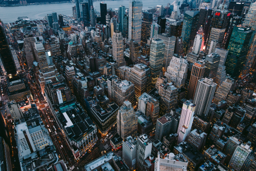

In [16]:
download_url(search_images('urban photos', max_images=1)[0], 'urban.jpg', show_progress=False)
Image.open('urban.jpg').to_thumb(256,256)

In [20]:
is_urban,_,probs = learn.predict(PILImage.create('urban.jpg'))
print(f"This is a: {is_urban}.")
print(f"Probability it's a urban: {max(probs):.4f}")
is_rural,_,probs = learn.predict(PILImage.create('rural.jpg'))
print(f"This is a: {is_rural}.")
print(f"Probability it's a rural: {max(probs):.4f}")
is_nature,_,probs = learn.predict(PILImage.create('nature.jpg'))
print(f"This is a: {is_nature}.")
print(f"Probability it's a nature: {max(probs):.4f}")

This is a: urban.
Probability it's a urban: 1.0000


This is a: rural.
Probability it's a rural: 0.9933


This is a: nature.
Probability it's a nature: 0.9999
